In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

from contact_graspnet.preprocessing import Depth2ImgPoints, Img2CamCoords, ZClipper
from contact_graspnet.postprocessing import Cam2WorldCoordConverter
from contact_graspnet.dataloading import YCBSimulationData

In [2]:
dataset = YCBSimulationData(
    Path.home() / "Documents" / "ycb_sim_data_1",
)

sample = dataset[9]

print(sample.name)

010_banana


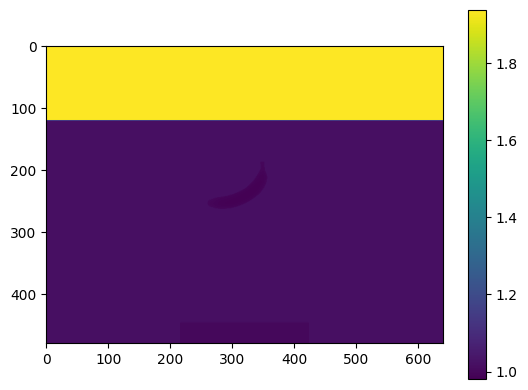

In [3]:
fig, ax = plt.subplots()

p = ax.imshow(sample.depth)

fig.colorbar(p)

plt.imshow(sample.depth)

plt.show()

In [4]:
pc_img, pc_img_colors = Depth2ImgPoints()(sample.depth, sample.rgb)
pc_img, pc_img_colors = ZClipper((0.2, 1.8))(pc_img, pc_img_colors)

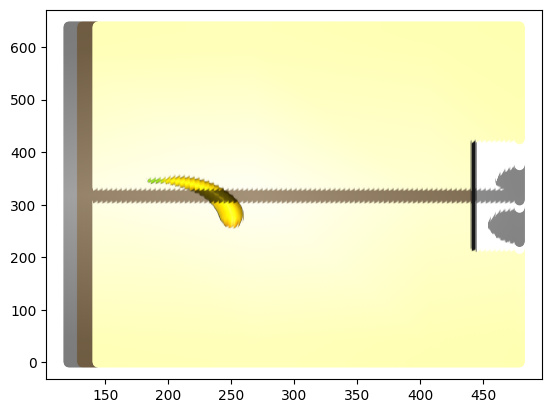

In [5]:
plt.scatter(pc_img[:, 0], pc_img[:, 1], c=pc_img_colors/255)
plt.show()

In [6]:
pc_cam = Img2CamCoords()(pc_img, sample.cam_intrinsics)

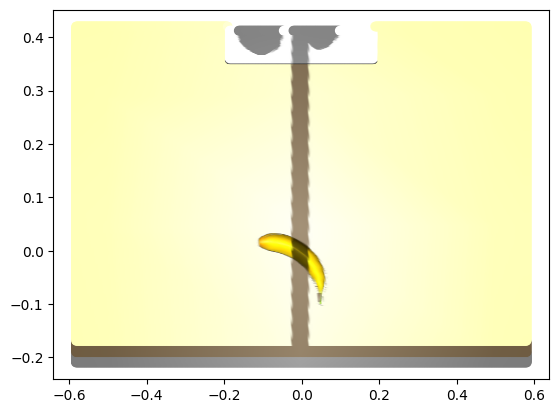

In [7]:
plt.scatter(pc_cam[:, 0], pc_cam[:, 1], c=pc_img_colors/255)
plt.show()

In [8]:


# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.set_box_aspect([1,1,1])
# # ax.set_aspect("equal")
  
# ax.scatter(pc[::100, 0], pc[::100, 1], pc[::100, 2])#, c = pc_colors[::100, :])
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")

# plt.show()

In [9]:
# pc = Img2CamCoords()(pc, sample.cam_intrinsics)

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # ax.set_aspect("equal")
# ax.set_box_aspect((1,1,1))

# ax.scatter(pc[::100, 0], pc[::100, 1], pc[::100, 2])# , c=dataset.transform.intermediate_results["full_pc_colors"])
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")

# plt.show()

In [10]:
# print(sample.cam_pos)

# cam2world_coord = Cam2WorldCoordConverter()

# pc_world = np.array([cam2world_coord(p, sample.cam_pos, sample.cam_rot) for p in pc[::100]])

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # ax.set_box_aspect([1,1,1])
  
# ax.scatter(pc_world[:, 0], pc_world[:, 1], pc_world[:, 2])# , c=dataset.transform.intermediate_results["full_pc_colors"])
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")

# plt.show()